In [21]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import optuna
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams["axes.unicode_minus"]=False 

In [2]:
data=pd.read_csv('./data_test.csv')
x_test_1=data.drop(['Ea','Unnamed: 0'],axis=1)

In [3]:
data=pd.read_excel('./test.xlsx')
x_test_2=data.drop(['Ea'],axis=1)
x_test_2

,metal,Surface,rA,rB,pA,pB,Er
0,Pt,111,CH3CCH,*,CH3CCH*,NaN,-2.09
1,Os,111,CH3CCH,*,CH3CCH*,NaN,-2.50
2,Au,111,CH3CCH,*,CH3CCH*,NaN,0.01
3,Rh,111,CH3CCH,*,CH3CCH*,NaN,-2.17
4,Pd,111,CH3CCH,*,CH3CCH*,NaN,-1.41
...,...,...,...,...,...,...,...
78,Au,111,CH3CH2CH2*,*,CH3CHCH2*,H*,0.54
79,Ag,111,CH3CH2CH2*,*,CH3CH2CH*,H*,1.78
80,Ag,111,CH3CH2CH2*,*,CH3CHCH2*,H*,0.17
81,Co,111,CH3CH2CH2*,*,CH3CH2CH*,H*,0.13


In [4]:
x_test_1

,111,211,CH3CCH,CH3CCH*,CH3CCH2*,CH3CCH3*,CH3CH2C*,CH3CH2CH*,CH3CH2CH2*,CH3CH2CH3,...,CH3CHCH2*.1,CH3CHCH3,CH3CHCH3*.1,H*,X,r,E,M,rou,Er
0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,-1.351199,1.430096,-0.916744,-0.619433,-1.059373,-0.20
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,-1.351199,1.430096,-0.916744,-0.619433,-1.059373,1.81
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,-1.351199,1.430096,-0.916744,-0.619433,-1.059373,1.97
3,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,-1.351199,1.430096,-0.916744,-0.619433,-1.059373,-0.24
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,-1.351199,1.430096,-0.916744,-0.619433,-1.059373,1.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.634694,-0.304848,-1.078164,-0.714507,-0.692395,-0.30
79,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.180776,-0.304848,-1.224909,-0.749776,-0.692395,-2.58
80,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0.180776,-0.304848,-1.224909,-0.749776,-0.692395,-0.30
81,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0.180776,-0.304848,-1.224909,-0.749776,-0.692395,-0.73


In [5]:
data=pd.read_csv('./try.csv')
train_data,test_data=train_test_split(data,test_size=0.2, random_state=1318)
feature=train_data.drop(['Ea','Unnamed: 0'],axis=1)
label=train_data['Ea']
x_test=test_data.drop(['Ea','Unnamed: 0'],axis=1)
y_test=test_data['Ea']

In [6]:
kfold = KFold(n_splits = 5, random_state = 1314, shuffle = True)

In [7]:
def optuna_objective(trial):
    gamma=trial.suggest_float('gamma',0.001,0.9)
    epsilon=trial.suggest_float('espilon',0.001,1)
    reg=SVR(gamma=gamma,epsilon=epsilon)
    loss=cross_val_score(reg,feature,label,cv=kfold,error_score='raise')
    return pow(abs(loss.mean()),0.5)

In [8]:
def optimizer_optuna(n_trials):
    algo=optuna.samplers.TPESampler(n_startup_trials=10,n_ei_candidates=24)
    study=optuna.create_study(sampler=algo,direction="maximize")
    study.optimize(optuna_objective,n_trials=n_trials,show_progress_bar=True)
    print("\n","\n","best params: ", study.best_trial.params,
          "\n","\n","best score: ", study.best_trial.values,
          "\n")
    
    return study.best_trial.params, study.best_trial.values

In [9]:
optimizer_optuna(300)

[I 2023-04-19 10:49:29,726] A new study created in memory with name: no-name-9cfafdc2-ad2b-4193-9fda-d2d8d21fe33a
Progress bar is experimental (supported from v1.2.0). The interface can change in the future.


  0%|          | 0/300 [00:00<?, ?it/s]

[I 2023-04-19 10:49:29,774] Trial 0 finished with value: 0.6567425393281225 and parameters: {'gamma': 0.6447840283271925, 'espilon': 0.20323701543125963}. Best is trial 0 with value: 0.6567425393281225.
[I 2023-04-19 10:49:29,850] Trial 1 finished with value: 0.25776899929764746 and parameters: {'gamma': 0.6411975996488595, 'espilon': 0.5855505670429156}. Best is trial 0 with value: 0.6567425393281225.
[I 2023-04-19 10:49:29,879] Trial 2 finished with value: 0.639782076853268 and parameters: {'gamma': 0.787244991241123, 'espilon': 0.1931882404404709}. Best is trial 0 with value: 0.6567425393281225.
[I 2023-04-19 10:49:29,906] Trial 3 finished with value: 0.7148497944333236 and parameters: {'gamma': 0.42658593776308795, 'espilon': 0.17408660834337675}. Best is trial 3 with value: 0.7148497944333236.
[I 2023-04-19 10:49:29,965] Trial 4 finished with value: 0.553175298699214 and parameters: {'gamma': 0.005454861585478454, 'espilon': 0.27629928068948356}. Best is trial 3 with value: 0.7148

({'gamma': 0.2085287005733961, 'espilon': 0.016231443892945382},
 [0.8154450972959245])

In [10]:
model = SVR(gamma=0.20965594074059465,epsilon= 0.016960585435740173).fit(X=feature , y=label)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('r2:',r2_score(label,model.predict(feature)))
print('MAE:',mean_absolute_error(label,model.predict(feature)))
print('测试集得分为：', r2_score(y_test,model.predict(x_test)),mean_absolute_error(y_test,model.predict(x_test)))

r2: 0.9527369146585851
MAE: 0.04053864324190204
测试集得分为： 0.603753432725358 0.17807401153672517


In [11]:
import catboost as cb
model = cb.CatBoostRegressor(iterations=3000,max_depth=5,l2_leaf_reg=2.67289,silent=True,random_state=1314,learning_rate=0.09).fit(X=feature , y=label)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
print('r2:',r2_score(label,model.predict(feature)))
print('MAE:',mean_absolute_error(label,model.predict(feature)))
print('测试集得分为：', r2_score(y_test,model.predict(x_test)),mean_absolute_error(y_test,model.predict(x_test)))

r2: 0.9999999989230962
MAE: 8.705638929030154e-06
测试集得分为： 0.8888411439104427 0.0923590522645178


In [12]:
# 预测1
Y1=model.predict(test_data.drop(['Ea','Unnamed: 0'],axis=1))
Y2=test_data['Ea']
d={'Y_pred':Y1,
   'Y_True':Y2
   }
pred_show=pd.DataFrame(d)
# 预测2
Y_1=model.predict(feature)
Y_2=label
d_1={'Y_pred':Y_1,
   'Y_True':Y_2
   }
pred_show_1=pd.DataFrame(d_1)

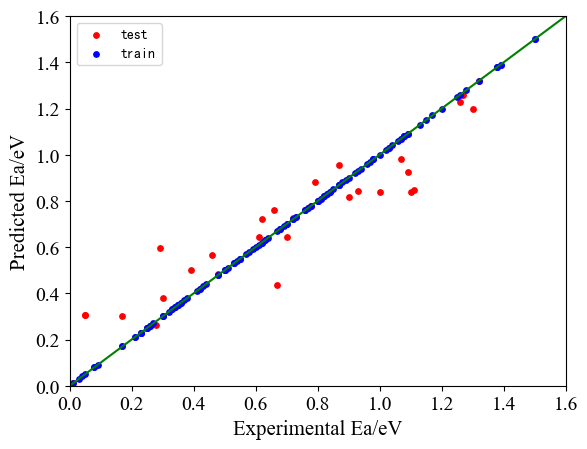

In [13]:
plt.scatter(pred_show.iloc[:,1],pred_show.iloc[:,0],color='r',s=15,label='test')
plt.scatter(pred_show_1.iloc[:,1],pred_show_1.iloc[:,0],color='b',s=15,label='train')
plt.xlim((0,1.6))
plt.xlabel('Experimental Ea/eV',fontsize=15,font=Path('..\TimesNewRoman.ttf'))
plt.xticks(fontsize=14,fontname='Times New Roman')
plt.ylim((0,1.6))
plt.ylabel('Predicted Ea/eV',fontsize=15,font=Path('..\TimesNewRoman.ttf'))
plt.yticks(fontsize=14,fontname='Times New Roman')
plt.plot([0,1.6],[0,1.6],color='g')
# plt.text(40,92,'Ridge',fontsize=20,font=Path('..\TimesNewRoman.ttf'))
plt.legend()
plt.show()

In [14]:
model.feature_importances_

array([2.49202890e-01, 4.18366116e-01, 0.00000000e+00, 2.52996984e-01,
       1.02013130e+00, 1.57591044e-01, 9.19838139e-01, 1.22539282e+00,
       5.07430310e-01, 0.00000000e+00, 3.33774282e-01, 1.19671416e-01,
       3.84604863e-02, 0.00000000e+00, 4.53894394e-01, 3.86963975e-01,
       2.10300527e+00, 4.99872355e-01, 4.17631602e-01, 5.21915944e-01,
       1.21896993e+00, 2.84915790e-01, 3.86315362e-01, 0.00000000e+00,
       3.41882461e-01, 3.88324013e-01, 1.19916337e+00, 2.50596335e-02,
       4.28665649e-02, 0.00000000e+00, 7.95580407e+00, 6.08473960e+00,
       1.45499364e+01, 1.15672208e+01, 3.43542839e+00, 4.28932342e+01])

In [15]:
def plot_feature_importances(feature_importances,title,feature_names):
#     将重要性值标准化
    feature_importances = 100.0*(feature_importances/max(feature_importances))
#     将得分从高到低排序
    index_sorted = np.flipud(np.argsort(feature_importances))
#     让X坐标轴上的标签居中显示
    pos = np.arange(index_sorted.shape[0])+0.5
    
    plt.figure(figsize=(40,10))
    plt.bar(pos,feature_importances[index_sorted],align='center')
    plt.xticks(pos,feature_names[index_sorted])
    plt.ylabel('Relative Importance')
    plt.title(title)
    plt.show() 

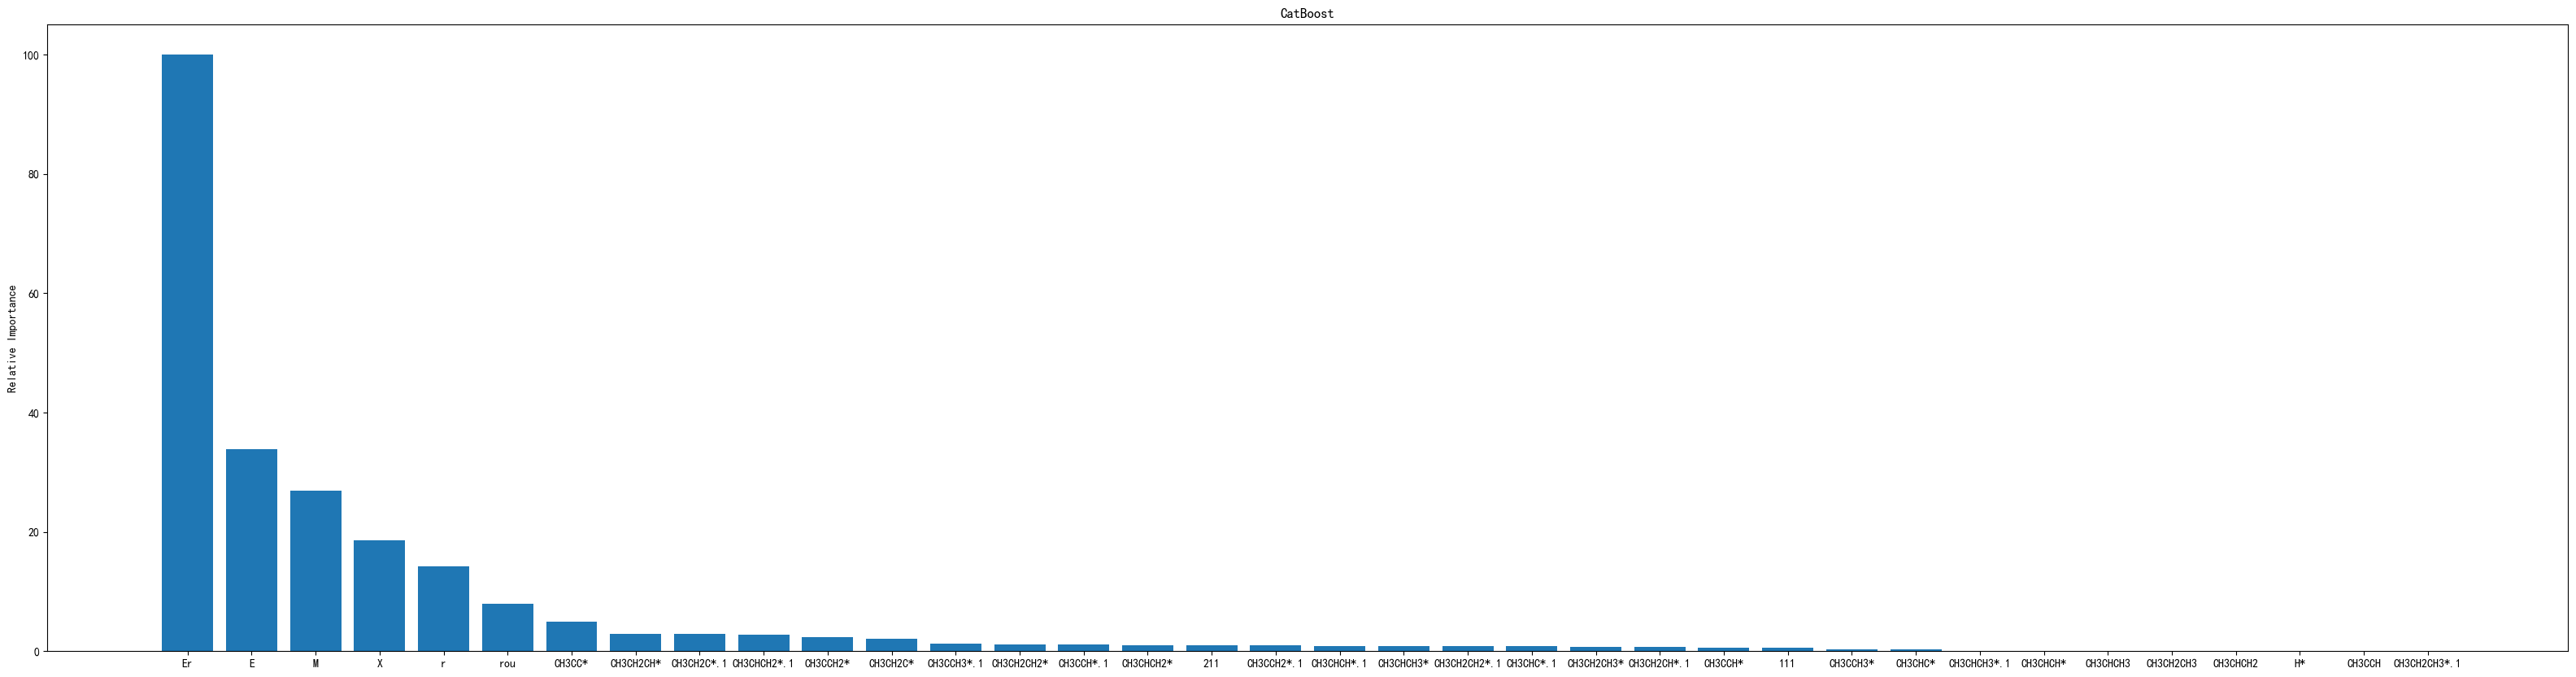

In [16]:
plot_feature_importances(model.feature_importances_,'CatBoost',feature.columns) 

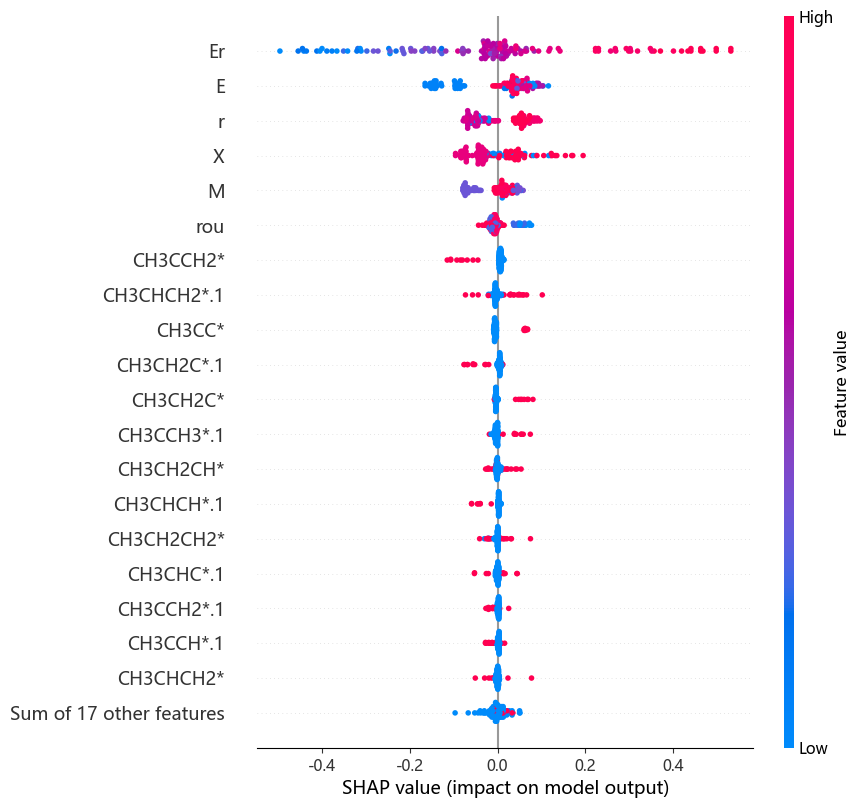

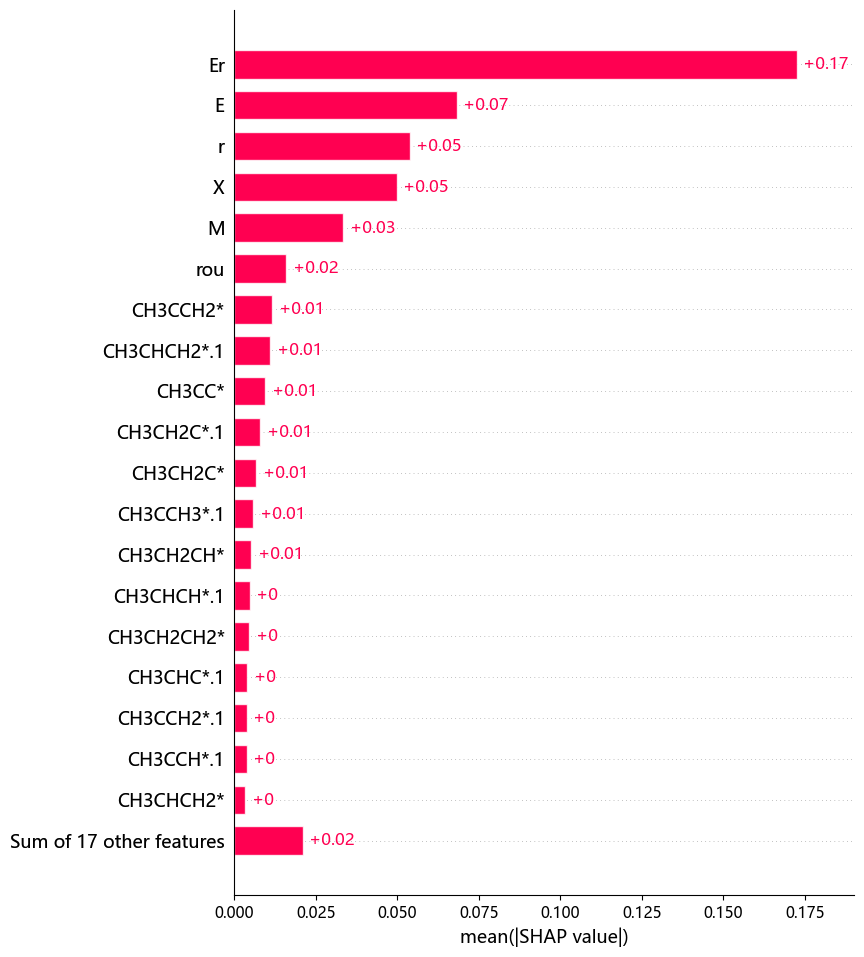

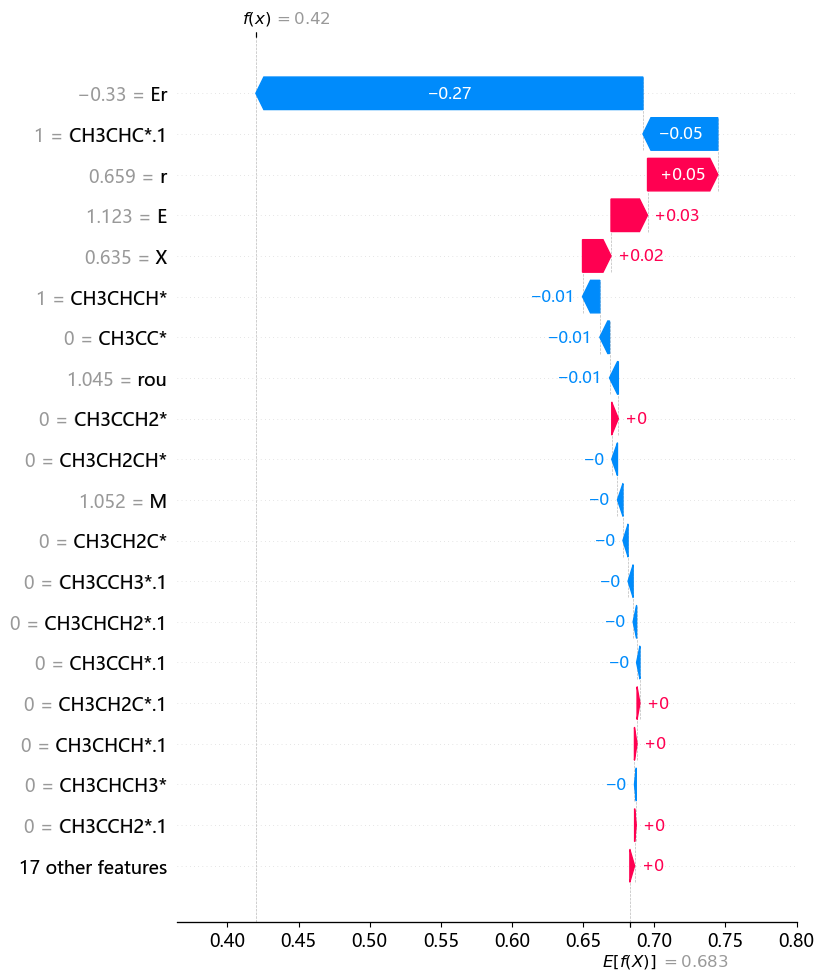

In [23]:
# shap提高解释性
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer(feature)
shap.plots.beeswarm(shap_values, max_display=20)
shap.plots.bar(shap_values, max_display=20)
shap.plots.waterfall(shap_values[5], max_display=20)

In [18]:
pre_1=model.predict(x_test_1)
pre_1

array([0.79879827, 1.27966412, 1.30733691, 0.6450199 , 1.22462094,
       1.24970221, 0.7316513 , 1.24963039, 1.31800319, 1.05423117,
       0.93019828, 1.26314406, 0.96986846, 0.8285256 , 1.32267171,
       1.30158535, 0.95640944, 0.78773723, 1.16191857, 1.18270206,
       0.64843658, 1.22799019, 1.21275493, 0.64220362, 1.17989175,
       1.2389514 , 1.25378218, 1.13327788, 1.16510306, 1.15071556,
       1.25689684, 1.24436765, 1.17042283, 1.35233998, 0.45263887,
       0.89181624, 1.13515968, 0.54939115, 1.23358769, 1.25913115,
       0.68661938, 0.387994  , 0.64304282, 1.00235963, 0.88385937,
       0.34590083, 0.83925015, 0.66376565, 0.80070374, 0.8429029 ,
       0.65192379, 0.11408465, 0.54835367, 0.18351681, 0.38655706,
       0.41088669, 0.81605913, 0.54467821, 0.56598485, 0.10849131,
       0.29413495, 0.20641636, 0.42079558, 0.46859751, 1.25366817,
       0.75816262, 0.76244176, 0.26717378, 0.89614098, 0.42478025,
       0.59503617, 0.48306859, 0.82189432, 0.68084303, 0.73130

In [19]:
y_test_1=pd.DataFrame(pre_1).round(5)
y_test_1.columns=(['Ea'])
fin=pd.concat([x_test_2,y_test_1],axis=1)
fin

,metal,Surface,rA,rB,pA,pB,Er,Ea
0,Pt,111,CH3CCH,*,CH3CCH*,NaN,-2.09,0.79880
1,Os,111,CH3CCH,*,CH3CCH*,NaN,-2.50,1.27966
2,Au,111,CH3CCH,*,CH3CCH*,NaN,0.01,1.30734
3,Rh,111,CH3CCH,*,CH3CCH*,NaN,-2.17,0.64502
4,Pd,111,CH3CCH,*,CH3CCH*,NaN,-1.41,1.22462
...,...,...,...,...,...,...,...,...
78,Au,111,CH3CH2CH2*,*,CH3CHCH2*,H*,0.54,0.47227
79,Ag,111,CH3CH2CH2*,*,CH3CH2CH*,H*,1.78,0.38646
80,Ag,111,CH3CH2CH2*,*,CH3CHCH2*,H*,0.17,0.69448
81,Co,111,CH3CH2CH2*,*,CH3CH2CH*,H*,0.13,0.43893


In [20]:
fin.to_csv('fin.csv')